<a href="https://colab.research.google.com/github/Linsvv-JiongMing/2019-syu-repository/blob/master/9517Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install -y git

In [ ]:
!git clone https://github.com/zae-bayern/elpv-dataset.git

In [61]:
%cd '/content/drive/MyDrive/9517Group/elpv-dataset'

/content/drive/MyDrive/9517Group/elpv-dataset


In [ ]:
!ls

doc  images  labels.csv  LICENSE.md  README.md	utils


In [62]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# DT
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# SGD
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Bayesian
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def plot_matrix(name, method):
  sns.set()
  confusion_mat = method
  labels = ['fully', 'possibly', 'likely', 'certainly']
  plt.figure(figsize=(7, 4))
  sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
              xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f"{name}")
  plt.show()


def evaluate_predic(predic, label, algorithm):
  accuracy = accuracy_score(label, predic)
  precision = precision_score(label, predic, average='macro')
  recall = recall_score(label, predic, average='macro')
  f1 = f1_score(label, predic, average='macro')
  cm = confusion_matrix(label, predic)
  print(f"{algorithm} Algorithm: Accuracy:{accuracy:.3f}; Precision:{precision:.3f}; Recall:{recall:.3f}; F1-score:{f1:.3f}")
  plot_matrix('Confusion Matrix', cm)


def pattern_recog(X_train, X_test, y_train, y_test, algorithm):
  if algorithm == 'KNN':
    # step 5: Initialise the classifier model
    KNN = KNeighborsClassifier()
    # step 6: Fit the model to the training data
    KNN.fit(X_train, y_train)
    # step 7: Use the trained/fitted model to evaluate the testing data
    KNNy = KNN.predict(X_test)
    evaluate_predic(y_test, KNNy, algorithm)

  elif algorithm == 'DT':
    # step 5: Initialise the classifier model
    DT = DecisionTreeClassifier()
    # step 6: Fit the model to the training data
    DT.fit(X_train, y_train)
    # step 7: Use the trained/fitted model to evaluate the testing data
    DTy = DT.predict(X_test)
    evaluate_predic(y_test, DTy, algorithm)

  elif algorithm == 'SGD':
    # step 5: Initialise the classifier model
    SGD = SGDClassifier(loss='perceptron', max_iter=250, penalty='l1')
    # step 6: Fit the model to the training data
    SGD.fit(X_train, y_train)
    # step 7: Use the trained/fitted model to evaluate the testing data
    SGDy = SGD.predict(X_test)
    evaluate_predic(y_test, SGDy, algorithm)
  else:
    print("Please enter another algorithm")


In [64]:
from utils.elpv_reader import load_dataset
images, probs, types = load_dataset()


In [ ]:
from collections import Counter
print(f"Total number of images:{len(images)}, probs:{len(probs)}, types:{len(types)}")

print("\n")

unique_probs = set(probs)
probs_counts = Counter(probs)
print(f"Unique probabilities:{unique_probs}")
print("value\t number")
for prob, count in sorted(probs_counts.items()):
  print(f"{prob:.1f}\t {count}")

print("\n")

unique_types = set(types)
types_counts = Counter(types)
print(f"Unique types:{unique_types}")
print("name\t number")
for prob, count in sorted(types_counts.items()):
  print(f"{prob:}\t {count}")



Total number of images:2624, probs:2624, types:2624


Unique probabilities:{0.0, 1.0, 0.6666666666666666, 0.3333333333333333}
value	 number
0.0	 1508
0.3	 295
0.7	 106
1.0	 715


Unique types:{'poly', 'mono'}
name	 number
mono	 1074
poly	 1550


In [ ]:
# 1. 数据预处理
labels = np.digitize(probs, bins=[0.1, 0.4, 0.7, 1]) - 1  # 将概率转换为0-3之间的整数
images_flattened = images.reshape(images.shape[0], -1)  # 将图像数据拉平

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.25, stratify=labels)


KNN Algorithm: Accuracy:0.666; Precision:0.412; Recall:0.540; F1-score:0.433


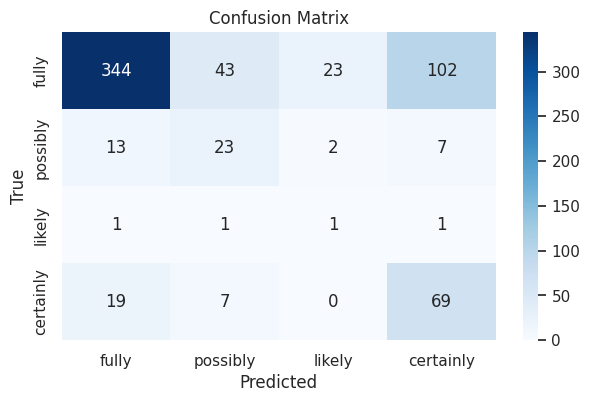

In [ ]:
pattern_recog(X_train, X_test, y_train, y_test, 'KNN')


DT Algorithm: Accuracy:0.556; Precision:0.406; Recall:0.396; F1-score:0.398


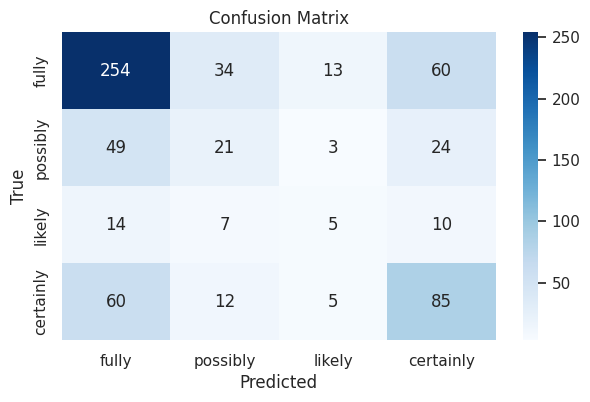

In [ ]:
pattern_recog(X_train, X_test, y_train, y_test, 'DT')


In [ ]:
# Getting indices based on types
mono_index = [i for i, t in enumerate(types) if t == 'mono']
poly_index = [i for i, t in enumerate(types) if t == 'poly']

# Fetching images based on indices
mono_images = [images[i] for i in mono_index]
poly_images = [images[i] for i in poly_index]

# Fetching probs values based on indices
mono_probs = [probs[i] for i in mono_index]
poly_probs = [probs[i] for i in poly_index]

# Creating labels based on probs values
mono_labels = np.digitize(mono_probs, bins=[0.1, 0.5, 0.8, 1]) - 1
poly_labels = np.digitize(poly_probs, bins=[0.1, 0.5, 0.8, 1]) - 1

# Flattening images
mono_flattened = np.array(mono_images).reshape(len(mono_images), -1)
poly_flattened = np.array(poly_images).reshape(len(poly_images), -1)

# Splitting data into training and testing set
Xmono_train, Xmono_test, ymono_train, ymono_test = train_test_split(mono_flattened, mono_labels, test_size=0.25, stratify=mono_labels)
Xpoly_train, Xpoly_test, ypoly_train, ypoly_test = train_test_split(poly_flattened, poly_labels, test_size=0.25, stratify=poly_labels)



In [ ]:
print(len(Xmono_train))
print(len(Xmono_test))
print(len(Xpoly_train))
print(len(Xpoly_test))

805
269
1162
388


KNN Algorithm: Accuracy:0.751; Precision:0.574; Recall:0.715; F1-score:0.619


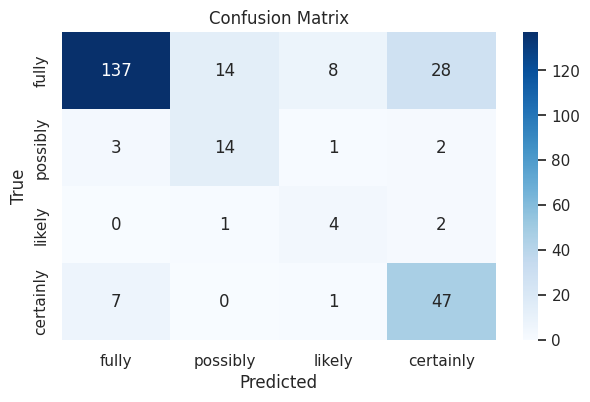

In [ ]:
pattern_recog(X_train, Xmono_test, y_train, ymono_test, 'KNN')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Algorithm: Accuracy:0.722; Precision:0.440; Recall:0.529; F1-score:0.462


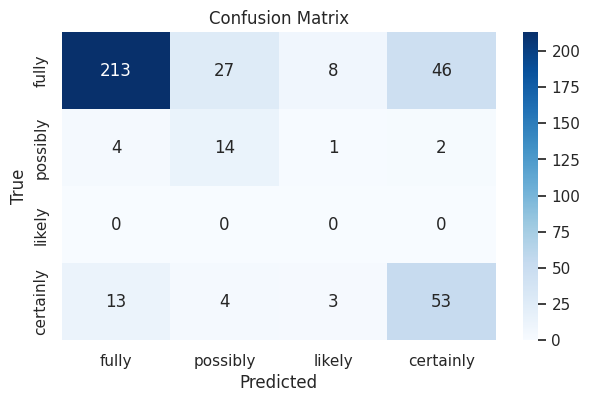

In [ ]:
pattern_recog(X_train, Xpoly_test, y_train, ypoly_test, 'KNN')

DT Algorithm: Accuracy:0.885; Precision:0.841; Recall:0.842; F1-score:0.840


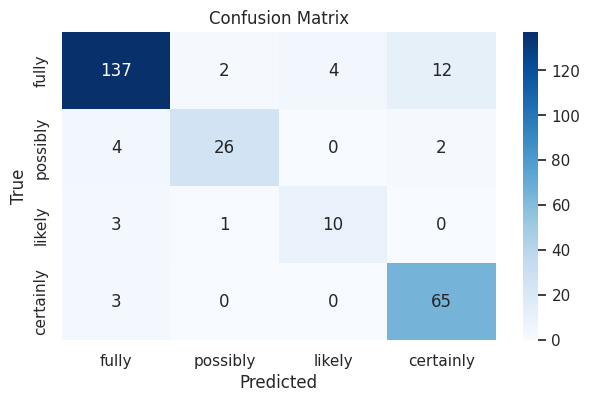

In [ ]:
pattern_recog(X_train, Xmono_test, y_train, ymono_test, 'DT')

DT Algorithm: Accuracy:0.902; Precision:0.873; Recall:0.834; F1-score:0.851


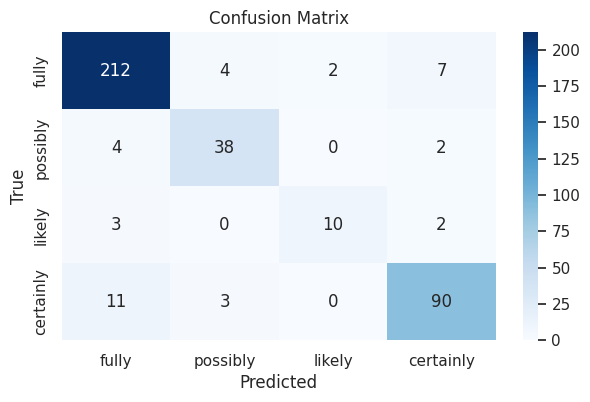

In [ ]:
pattern_recog(X_train, Xpoly_test, y_train, ypoly_test, 'DT')

# **神经网络**

In [ ]:
images, probs, types

(array([[[14, 14, 14, ...,  9,  9,  9],
         [15, 15, 15, ..., 10,  9,  9],
         [15, 15, 16, ..., 10, 10, 10],
         ...,
         [29, 29, 29, ..., 19, 18,  4],
         [29, 29, 29, ..., 18, 18,  4],
         [29, 29, 29, ..., 18, 18,  4]],
 
        [[29, 29, 29, ..., 17, 16,  3],
         [29, 29, 29, ..., 17, 16,  3],
         [29, 29, 29, ..., 16, 15,  3],
         ...,
         [21, 22, 21, ..., 12, 12, 11],
         [20, 20, 20, ..., 12, 12, 11],
         [19, 19, 18, ..., 12, 12, 10]],
 
        [[29, 29, 30, ..., 19, 18,  4],
         [29, 30, 30, ..., 19, 18,  4],
         [30, 30, 31, ..., 18, 18,  3],
         ...,
         [35, 35, 35, ..., 21, 12,  0],
         [35, 35, 35, ..., 21, 12,  0],
         [35, 35, 35, ..., 21, 12,  0]],
 
        ...,
 
        [[66, 65, 62, ..., 62, 62, 62],
         [64, 62, 61, ..., 60, 60, 61],
         [63, 61, 59, ..., 61, 60, 60],
         ...,
         [45, 50, 55, ..., 57, 51, 47],
         [45, 47, 48, ..., 52, 49, 46],


In [ ]:
!pip install tensorflow

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [66]:
print(len(images))
print(len(probs))
print(len(types))

2624
2624
2624


In [67]:
# 1. base初始化环境
import numpy as np
import cv2
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# 3. 加载标签数据
data = pd.read_csv('labels.csv', sep=" ", header=None)

In [68]:
d = {'images': data.iloc[:, 0], 'probs': data.iloc[:, 2],'types': data.iloc[:, 19]}
df = pd.DataFrame(data=d)
df

,images,probs,types
0,images/cell0001.png,1.0,mono
1,images/cell0002.png,1.0,mono
2,images/cell0003.png,1.0,mono
3,images/cell0004.png,0.0,mono
4,images/cell0005.png,1.0,mono
...,...,...,...
2619,images/cell2620.png,0.0,poly
2620,images/cell2621.png,0.0,poly
2621,images/cell2622.png,0.0,poly
2622,images/cell2623.png,0.0,poly


In [69]:
# Assuming 'data' is your DataFrame
grouped = df.groupby('probs')

# This will create a dictionary of DataFrames split by the unique values in 'probs'
grouped_images = {k: v for k, v in grouped}

# grouped_images[0]
# grouped_images[1/3]
grouped_images

{0.0:                    images  probs types
 3     images/cell0004.png    0.0  mono
 8     images/cell0009.png    0.0  mono
 10    images/cell0011.png    0.0  mono
 59    images/cell0060.png    0.0  mono
 60    images/cell0061.png    0.0  poly
 ...                   ...    ...   ...
 2619  images/cell2620.png    0.0  poly
 2620  images/cell2621.png    0.0  poly
 2621  images/cell2622.png    0.0  poly
 2622  images/cell2623.png    0.0  poly
 2623  images/cell2624.png    0.0  poly
 
 [1508 rows x 3 columns],
 0.3333333333333333:                    images     probs types
 57    images/cell0058.png  0.333333   NaN
 86    images/cell0087.png  0.333333   NaN
 92    images/cell0093.png  0.333333   NaN
 97    images/cell0098.png  0.333333   NaN
 126   images/cell0127.png  0.333333   NaN
 ...                   ...       ...   ...
 2611  images/cell2612.png  0.333333   NaN
 2614  images/cell2615.png  0.333333   NaN
 2615  images/cell2616.png  0.333333   NaN
 2616  images/cell2617.png  0.333333 

In [ ]:
df['images']

0       images/cell0001.png
1       images/cell0002.png
2       images/cell0003.png
3       images/cell0004.png
4       images/cell0005.png
               ...         
2619    images/cell2620.png
2620    images/cell2621.png
2621    images/cell2622.png
2622    images/cell2623.png
2623    images/cell2624.png
Name: images, Length: 2624, dtype: object

In [72]:
image_data = []
for image_path in df['images']:
  image = Image.open(image_path)
  image = image.resize((128, 128))  # 假设我们缩放到128x128
  image_array = np.array(image)
  # 确保图像是三通道的，如果不是，需要转换
  if len(image_array.shape) == 2:  # 如果是灰度图像，添加一个通道维度
      image_array = np.stack((image_array,)*3, axis=-1)
  image_data.append(image_array)

image_data = np.array(image_data)

print("Image data shape:", image_data.shape)
image_data = image_data / 255.0  # 归一化像素值

# 类别标签转换为one-hot编码
labels = to_categorical(df['probs'], 4)

# 划分训练集和验证集
Xcnn_train, Xcnn_test, ycnn_train, ycnn_test = train_test_split(image_data, labels, test_size=0.25, random_state=42)

# 构建CNN模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(Xcnn_train, ycnn_train, epochs=7, validation_data=(Xcnn_test, ycnn_test))

# 评估模型
val_loss, val_accuracy = model.evaluate(Xcnn_test, ycnn_test)
print(f'Validation accuracy: {val_accuracy}')

Image data shape: (2624, 128, 128, 3)
Epoch 1/7
62/62 [==============================] - 62s 992ms/step - loss: 0.6719 - accuracy: 0.7063 - val_loss: 0.5017 - val_accuracy: 0.7454
Epoch 2/7
62/62 [==============================] - 61s 984ms/step - loss: 0.5446 - accuracy: 0.7464 - val_loss: 0.4762 - val_accuracy: 0.7790
Epoch 3/7
62/62 [==============================] - 63s 1s/step - loss: 0.5176 - accuracy: 0.7561 - val_loss: 0.4604 - val_accuracy: 0.8034
Epoch 4/7
62/62 [==============================] - 60s 970ms/step - loss: 0.5340 - accuracy: 0.7403 - val_loss: 0.4891 - val_accuracy: 0.7561
Epoch 5/7
62/62 [==============================] - 58s 941ms/step - loss: 0.4851 - accuracy: 0.7937 - val_loss: 0.4288 - val_accuracy: 0.8034
Epoch 6/7
62/62 [==============================] - 61s 990ms/step - loss: 0.4482 - accuracy: 0.8064 - val_loss: 0.4157 - val_accuracy: 0.8232
Epoch 7/7
21/21 [==============================] - 6s 313ms/step - loss: 0.4097 - accuracy: 0.8247
Validation acc